In [1]:
# this is a tutorial found at https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# this tutorial uses the iris.csv file and will help set up a bunch of different ml models

# they call this the hello world of machine learning

# heres all of the libraries the tutorial uses

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# visualizing results
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# ml algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
# loading dataset
dataset = read_csv("iris.csv")

# eyeball the data
dataset.shape



(150, 5)

In [5]:
dataset.head(20)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
dataset.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
dataset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

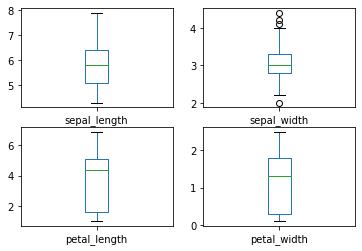

In [11]:
# making a box and whisker plot
dataset.plot(kind="box" , subplots=True, layout =(2,2), sharex= False)
pyplot.show()

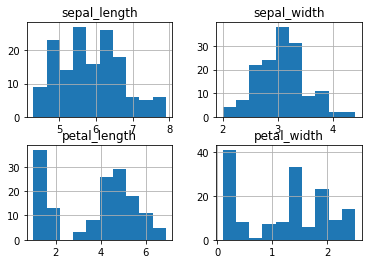

In [12]:
# making a hystogram
dataset.hist()
pyplot.show()

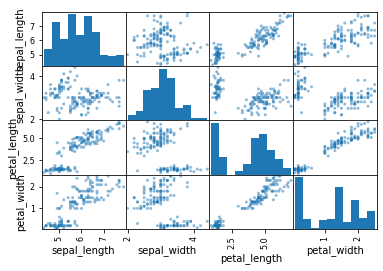

In [19]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [32]:
# now it's time to evaluate some ml algorithms!
# first we need to split the data into a training (x) and a testiing set (y)


# this time we are using numpy arrays
array = dataset.values
# x is all of the columns from attays except the 4th (species)
# so this function is taking all of the rows (:), then columns 0-3 (0:4 noninclusive)
x = array[:,0:4] 
# y is the species column
y = array[:,4]
# this is splitting into training and validation arrays. the validation set is 20% of the total set
# this is a much easier way to split things up than what I did on my own
# this method does everything for you!
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.20, random_state=1)
# so x_train and y_tain will be used to run the tests 
# # where x_validation and y_validation will be used to validate our model

In [38]:
# the tutorial tests 6 pre-written algorithms
# 1 Logistic Regression, 2 Linear Disriminant Analysis, 3 K-Nearest Neighbors, 
# 4 Classification and Regression Trees, 5 Gaussian Naive Bayes, 6 Support Vector Machines

# First we want to spot check the different algorithms
models = []
models.append(("LR", LogisticRegression(solver = "liblinear", multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(('SVM', SVC(gamma="auto")))

results = []
names = []
for name, model in models:
    # using k fold which folds our data into 10 parts and trains on 9 tests on 1
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    # this actually runs the model and stores it in cv_results
    cv_results=cross_val_score(model, x_train, y_train, cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    # print results which are just the mean an standard deviation of the 10 sets
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")


LR: 0.9416666666666667 (0.06508541396588878)
LDA: 0.975 (0.03818813079129868)
KNN: 0.9583333333333333 (0.04166666666666669)
CART: 0.9499999999999998 (0.04082482904638632)
NB: 0.95 (0.05527707983925667)
SVM: 0.9833333333333332 (0.03333333333333335)


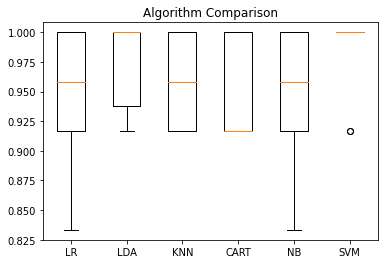

In [50]:
# it appears that the SVM did better overall so will chose that one to move on with
# first lets show the results of the different algorithms


pyplot.boxplot(results, labels=names)
pyplot.title("Algorithm Comparison")
pyplot.show()


In [51]:
# using them model to predict with the validation set

# chose SVM
model = SVC(gamma="auto")
model.fit(x_train, y_train)
prediction = model.predict(x_validation)
print(accuracy_score(y_validation, prediction))

0.9666666666666667


In [52]:
# this means this model was about 96% accurate
print(confusion_matrix(y_validation, prediction))
# the confusion matrix reads like this:
# the diagonal is the correct guess
# predicted is along the rows and actual values is along the columns
# so in the second row where there is a 1 is the 3rd column
# the algorithm predicted it was of type 2 when it actually was type 3

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [54]:
# classification report
print(classification_report(y_validation, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [56]:
"done"

'done'